In [53]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib tk
import numpy as np
import math
import numpy.linalg as npla 
import os
import pandas as pd
import csv 

In [105]:
##Average number of times a user logged on the month of October 2019
df = pd.read_csv("showwcase_sessions.csv")
#A list of all distinguished users (user ids)
users = []

for x in range(0,299):    
    there = False
    if(len(users) == 0):
        users.append(int(df['customer_id'][x]))
    for y in range(len(users)):
        if(users[y] == int(df['customer_id'][x])):
            there = True
    if there == False:
        users.append(int(df['customer_id'][x]))

print("Average number of times each user logged on (October 2019): ", 300/len(users))



Average number of times each user logged on (October 2019):  6.25


Average number of logins per day by users:  9.966666666666667


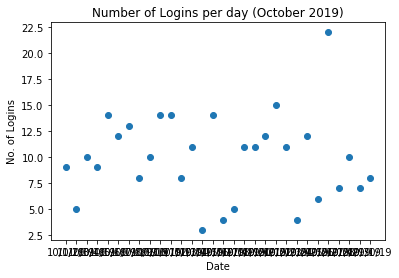

In [106]:
#A list of all distinguished dates in the month
dates = []
#A list of the sum of logins per day
logins = []

for x in range(299,0, -1):    
    there = False
    if(len(dates) == 0):
        dates.append(df['login_date'][x])
    for y in range(len(dates)):
        if(dates[y] == (df['login_date'][x])):
            there = True
    if there == False:
        dates.append(df['login_date'][x])
        
for i in range(len(dates)):
    sum = 0
    for y in range(299,0,-1):
        if(dates[i] == df['login_date'][y]):
            sum = sum + 1
    logins.append(sum)
    
loginSum = 0
for x in range(len(logins)):
    loginSum = loginSum + logins[x]
    
    

%matplotlib inline
plt.plot(dates, logins, 'o')
plt.xlabel('Date')
plt.ylabel('No. of Logins')
plt.title('Number of Logins per day (October 2019)')

print("Average number of logins per day by users: ", loginSum/30) #we can use the length of the list to resuse code



Average number of times projects were added per day:  7.566666666666666


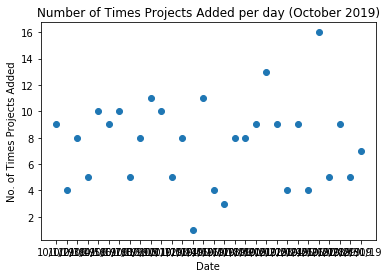

In [107]:
#Average number of users who added projects (at least one) per day

#List of projects per day
projects = []
for i in range(len(dates)):
    sum = 0
    for y in range(299,0,-1):
        if(dates[i] == df['login_date'][y]):
            if((df['projects_added'][y]) == True):
                sum = sum + 1
    projects.append(sum)
    
projectSum = 0
for x in range(len(projects)):
    projectSum = projectSum + projects[x]
    

%matplotlib inline
plt.plot(dates, projects, 'o')
plt.xlabel('Date')
plt.ylabel('No. of Times Projects Added')
plt.title('Number of Times Projects Added per day (October 2019)')

print("Average number of times projects were added per day: ", projectSum/len(projects))


Average number of Projects Added per day:  16.2


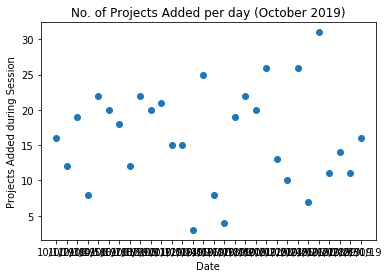

In [108]:
#Average number of projects added 
projectsNumber = []
for i in range(len(dates)):
    sum = 0
    for y in range(299,0,-1):
        if(dates[i] == df['login_date'][y]):
                sum = sum + df['session_projects_added'][y]
    projectsNumber.append(sum)
    
projectsNumberSum = 0
for x in range(len(projectsNumber)):
    projectsNumberSum = projectsNumberSum + projectsNumber[x]
    

%matplotlib inline
plt.plot(dates, projectsNumber, 'o')
plt.xlabel('Date')
plt.ylabel('Projects Added during Session')
plt.title('No. of Projects Added per day (October 2019)')

print("Average number of Projects Added per day: ", projectsNumberSum/len(projectsNumber))



Average number of times Bugs Encountered per day:  3.8666666666666667
Average number of times Bugs Encountered per day PER USER:  0.3528048803048804


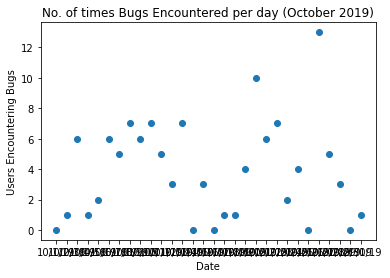

In [109]:
#Average number of times bugs encountered at least once per day 
bugs = []
perUserBugs = []
for i in range(len(dates)):
    sum = 0
    count = 0
    for y in range(299,0,-1):
        if(dates[i] == df['login_date'][y]):
            if((df['bug_occured'][y]) == True):
                sum = sum + 1
            count = count + 1
    perUserBugs.append(sum/count)
    bugs.append(sum)
    
bugSum = 0
for x in range(len(bugs)):
    bugSum = bugSum + bugs[x]

perUserSum = 0
for x in range(len(bugs)):
    perUserSum = perUserSum + perUserBugs[x]
    

%matplotlib inline
plt.plot(dates, bugs, 'o')
plt.xlabel('Date')
plt.ylabel('Users Encountering Bugs')
plt.title('No. of times Bugs Encountered per day (October 2019)')

print("Average number of times Bugs Encountered per day: ", bugSum/len(bugs))
print("Average number of times Bugs Encountered per day PER USER: ", perUserSum/len(perUserBugs))

Average number of Bugs Encountered per day:  12.333333333333334


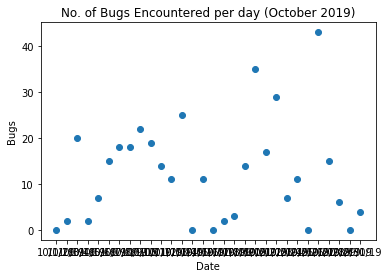

In [110]:
#Average number of bugs 
bugsNumber = []
for i in range(len(dates)):
    sum = 0
    for y in range(299,0,-1):
        if(dates[i] == df['login_date'][y]):
                sum = sum + df['bugs_in_session'][y]
    bugsNumber.append(sum)
    
bugNumberSum = 0
for x in range(len(bugsNumber)):
    bugNumberSum = bugNumberSum + bugsNumber[x]
    

%matplotlib inline
plt.plot(dates, bugsNumber, 'o')
plt.xlabel('Date')
plt.ylabel('Bugs')
plt.title('No. of Bugs Encountered per day (October 2019)')

print("Average number of Bugs Encountered per day: ", bugNumberSum/len(bugsNumber))



Average Time User had Active Session per day:  450.8597142672143  seconds or  7.514328571120239  minutes


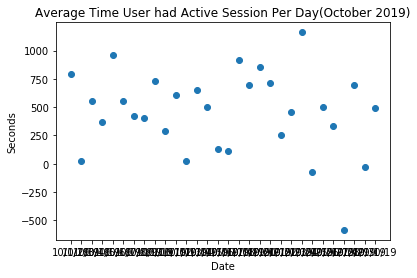

In [111]:
#Average active time
active = []
for i in range(len(dates)):
    sum = 0
    count = 0
    for y in range(299,0,-1):
        if(dates[i] == df['login_date'][y]):
                sum = sum + ((df['session_duration'][y]) - (df['inactive_duration'][y]))
                count = count + 1
    sumPerUser = sum / count
    active.append(sumPerUser)
    
activeSum = 0
for x in range(len(active)):
    activeSum = activeSum + active[x]
    

%matplotlib inline
plt.plot(dates, active, 'o')
plt.xlabel('Date')
plt.ylabel('Seconds')
plt.title('Average Time User had Active Session Per Day(October 2019)')

print("Average Time User had Active Session per day: ", activeSum/len(active), " seconds or ",(activeSum/len(active))/60, " minutes" )


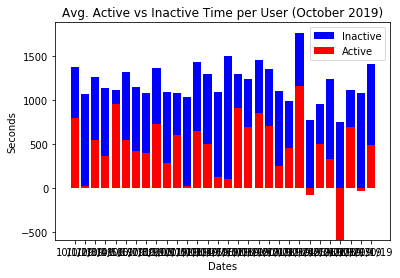

In [112]:
#Average inactive time
inactive = []
for i in range(len(dates)):
    sum = 0
    count = 0
    for y in range(299,0,-1):
        if(dates[i] == df['login_date'][y]):
                sum = sum + (df['inactive_duration'][y])
                count = count + 1
    sumPerUser = sum / count
    inactive.append(sumPerUser)
    

ind = [x for x, _ in enumerate(dates)]
plt.bar(ind, inactive, width=0.8, label='Inactive', color='blue', bottom=active)
plt.bar(ind, active, width=0.8, label='Active', color='red')
plt.xticks(ind, dates)
plt.ylabel("Seconds")
plt.xlabel("Dates")
plt.legend(loc="upper right")
plt.title("Avg. Active vs Inactive Time per User (October 2019)")

plt.show()


Times Likes were left per user:  4.4375


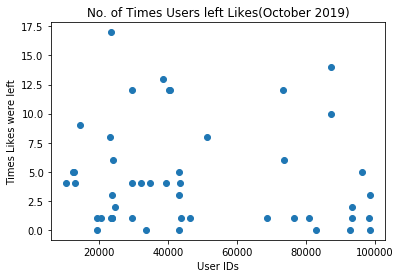

In [113]:
#counting the number of users who give a like
likes = []

for x in range(len(users)):
    engageSumL = 0
    for y in range(0, 299):
        if(users[x] == (df['customer_id'][y])):
            if((df['likes_given'][y]) == True):
                engageSumL = engageSumL + 1
    likes.append(engageSumL)

sumLikes = 0
for i in range(len(likes)):
    sumLikes = sumLikes + likes[i]

%matplotlib inline
plt.plot(users, likes, 'o')
plt.xlabel('User IDs')
plt.ylabel('Times Likes were left')
plt.title('No. of Times Users left Likes(October 2019)')

print("Times Likes were left per user: ", sumLikes/len(likes))            
            

Times Comments were left per user:  160.70833333333334


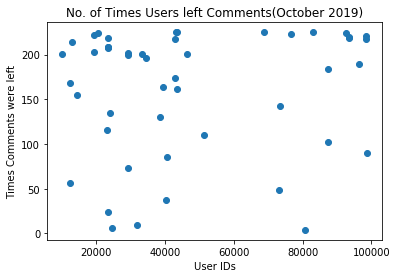

In [114]:
#counting the number of users who gave a comment
comments = []

for x in range(len(users)):
    engageSumC = 0
    for y in range(0, 299):
        if(users[x] == (df['customer_id'][y])):
            if((df['comment_given'][y]) == True):
                engageSumL = engageSumL + 1
    comments.append(engageSumL)

commentLikes = 0
for i in range(len(comments)):
    commentLikes = commentLikes + comments[i]

%matplotlib inline
plt.plot(users, comments, 'o')
plt.xlabel('User IDs')
plt.ylabel('Times Comments were left')
plt.title('No. of Times Users left Comments(October 2019)')

print("Times Comments were left per user: ", commentLikes/len(comments))  

Average Likes left per user in October 2019:  65.14583333333333


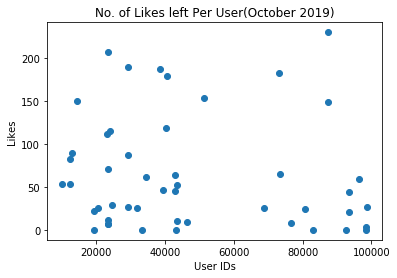

In [122]:
#counting the number of likes per user
likesUser = []

for x in range(len(users)):
    engageSumLik = 0
    for y in range(0, 299):
        if(users[x] == (df['customer_id'][y])):
            if((df['likes_given'][y]) == True):
                engageSumLik = engageSumLik + (df['session_likes_given'][y])
    likesUser.append(engageSumLik)

sumLikesC = 0
for i in range(len(likesUser)):
    sumLikesC = sumLikesC + likesUser[i]

%matplotlib inline
plt.plot(users, likesUser, 'o')
plt.xlabel('User IDs')
plt.ylabel('Likes')
plt.title('No. of Likes left Per User(October 2019)')


print("Average Likes left per user in October 2019: ", sumLikesC/len(likesUser))  

Average Comments left per user in October 2019:  15.041666666666666


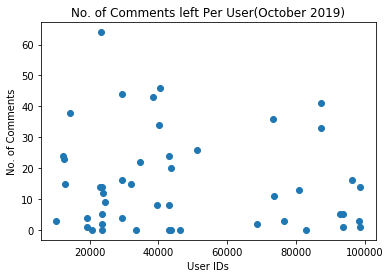

In [123]:
#counting the number of comments per user
commentsUser = []

for x in range(len(users)):
    engageSumCom = 0
    for y in range(0, 299):
        if(users[x] == (df['customer_id'][y])):
            if((df['comment_given'][y]) == True):
                engageSumCom = engageSumCom + (df['session_comments_given'][y])
    commentsUser.append(engageSumCom)

sumCommentsC = 0
for i in range(len(commentsUser)):
    sumCommentsC = sumCommentsC + commentsUser[i]

%matplotlib inline
plt.plot(users, commentsUser, 'o')
plt.xlabel('User IDs')
plt.ylabel('No. of Comments')
plt.title('No. of Comments left Per User(October 2019)')


print("Average Comments left per user in October 2019: ", sumCommentsC/len(commentsUser))  